### <p style="color:red">Bölüm 1 - Proje Özeti </p>

- Veriler, ortaokuldaki öğrencilerin Portekizce kursu sınav sonuçları anketinde elde edildi. Veri kümesi , öğrenciler hakkında  sosyal, cinsiyet ve çalışma bilgisi içerir. 

- Bu çalışmada verilen kolonları kullanarak öğrencilerin final notlarını tahmin etmeyi , final notlarını olumlu ve olumsuz etkileyen özellikleri incelemeyi hedeflemekteyim.

- Çalışma sonucunda : Öğrencilerin final sınavından aldıkları  notların ; öğrencilerin yaşı , öğrencinin daha yüksek öğrenim görme isteği , okuldan aldığı desteğin ve okul günlerinde alkol tüketiminin final notların üzerinde etkilerin olduğunu gördük.

- Veri setim : https://www.kaggle.com/uciml/student-alcohol-consumption




In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
alccon = pd.read_csv('student-por.csv') 

alccontemp=pd.read_csv('student-por.csv') 
#tempi grafik çizerken kullanacağız. Alccon ise regresyon ve feature selection işlemlerinde kullanılacak label encodingli.

In [3]:
alccon.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### <p style="color:red">Bölüm 2 - Veri Seti Tanımı </p>
- Veri setimiz Öğrencilerin kişisel ve sosyal bilgilerinin yanısıra okul durumu ile alakalı devamsızlık ve not bilgilerini içermektedir.
- Sample sayısı : 649 
- Variable sayısı : 33 


In [4]:
print("Örnek Sayısı:",len(alccon))
print("Değişken Sayısı:",len(alccon.columns))
print("Değişken Türleri:",alccon.dtypes)

Örnek Sayısı: 649
Değişken Sayısı: 33
Değişken Türleri: school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


### <p style="color:red">Bölüm 3 - Veri Setinin İstatistik bilgileri </p>


In [5]:
alccon.describe() #describe yardımyla kolonların istatistik bilgilerini çıkardık.

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
# Missing Value kontrolü için isnull komutunu kullandık.
MissingValues = alccon.isnull().sum()
print(MissingValues)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [7]:
# Outlier tespiti için kullandığımız fonksiyon.
def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [8]:
#Önce int tipindeki kolonlarda outlier arıyoruz.
intcolumns = alccon.select_dtypes(include='int64').columns
for x in intcolumns:
    print("for column {} ' s  outliers".format(x))
    print(outliers_z_score(alccon[x]))#108

for column age ' s  outliers
(array([279, 407, 413], dtype=int64),)
for column Medu ' s  outliers
(array([], dtype=int64),)
for column Fedu ' s  outliers
(array([], dtype=int64),)
for column traveltime ' s  outliers
(array([ 61, 108, 136, 138, 141, 162, 178, 242, 262, 379, 385, 445, 458,
       459, 527, 631], dtype=int64),)
for column studytime ' s  outliers
(array([], dtype=int64),)
for column failures ' s  outliers
(array([ 18,  78, 131, 169, 170, 179, 237, 279, 478, 543, 557, 568, 571,
       610], dtype=int64),)
for column famrel ' s  outliers
(array([ 25,  66, 108, 150, 198, 221, 299, 344, 369, 428, 433, 434, 453,
       454, 491, 502, 539, 563, 582, 601, 615, 646], dtype=int64),)
for column freetime ' s  outliers
(array([], dtype=int64),)
for column goout ' s  outliers
(array([], dtype=int64),)
for column Dalc ' s  outliers
(array([ 29,  61,  66, 100, 143, 237, 250, 279, 379, 413, 447, 457, 500,
       523, 530, 576, 598], dtype=int64),)
for column Walc ' s  outliers
(array([], 

In [9]:
objectcolumns = alccon.select_dtypes(include='object').columns
for x in objectcolumns:
    print(x)
    print(alccon[x].value_counts())
    print("----------")
    
# Daha sonra object tipindekiler için ise sayı oranlarına baktık.
#Pek outlier gibi duran yok. Verilerin bir çoğu yakın birbirine.

school
GP    423
MS    226
Name: school, dtype: int64
----------
sex
F    383
M    266
Name: sex, dtype: int64
----------
address
U    452
R    197
Name: address, dtype: int64
----------
famsize
GT3    457
LE3    192
Name: famsize, dtype: int64
----------
Pstatus
T    569
A     80
Name: Pstatus, dtype: int64
----------
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64
----------
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
----------
reason
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64
----------
guardian
mother    455
father    153
other      41
Name: guardian, dtype: int64
----------
schoolsup
no     581
yes     68
Name: schoolsup, dtype: int64
----------
famsup
yes    398
no     251
Name: famsup, dtype: int64
----------
paid
no     610
yes     39
Name: paid, dtype: int64
----------
activities
no     334
yes 

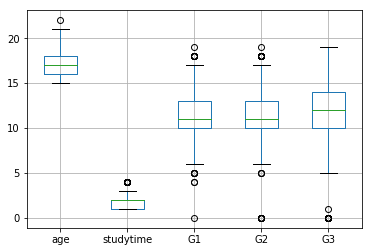

In [10]:
# 5 kolonu içeren bir boxplot
boxplot = alccon.boxplot(column=['age','studytime','G1','G2','G3'])

boxplot 

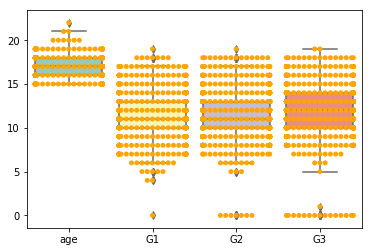

In [11]:
#Burada ise o değerlerin nerede olduğunu gösteriyoruz.
import seaborn as sns
columns =["age","G1","G2","G3"]

ax = sns.boxplot(data=alccon[columns],palette="Set3")
ax = sns.swarmplot(data=alccon[columns], color="orange")
ax

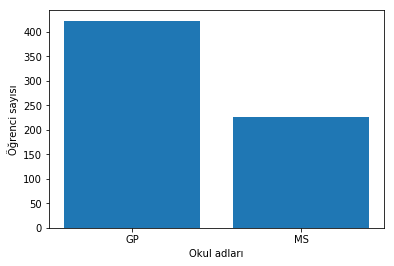

In [12]:


agecounts= alccon['school'].value_counts()
agelabels = agecounts.axes[0].tolist() # bu sadece cinsiyetleri veriyor liste olarak ['F','M']
a=agecounts.tolist() # a ise sayılarını veriyor  liste olarak [208,197]
x=agelabels
y = (a[0],a[1])
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Okul adları')
plt.ylabel('Öğrenci sayısı')
plt.show()


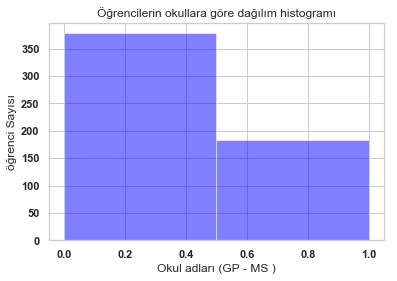

In [146]:

x = [alccon['school']]
schoolcounts= alccon['school'].value_counts()
schoollabels = schoolcounts.axes[0].tolist()
num_bins = len(schoollabels)
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Okul adları (GP - MS )')
plt.ylabel('öğrenci Sayısı')
plt.title(r'Öğrencilerin okullara göre dağılım histogramı')

plt.show()

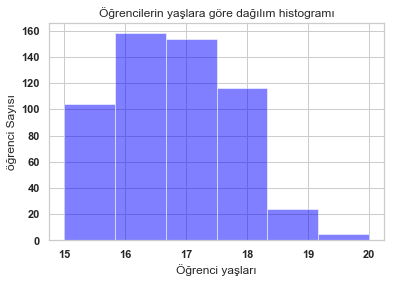

In [141]:
x = [alccon['age']]
agecounts= alccon['age'].value_counts()
agelabels = agecounts.axes[0].tolist()
num_bins = len(agelabels)
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Öğrenci yaşları')
plt.ylabel('öğrenci Sayısı')
plt.title(r'Öğrencilerin yaşlara göre dağılım histogramı')
plt.show()


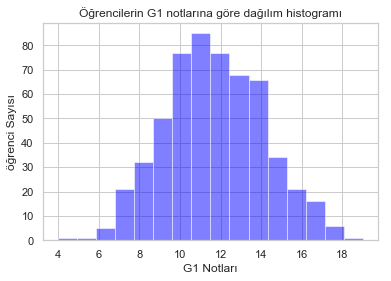

In [126]:
x = [alccon['G1']]
g1counts= alccon['G1'].value_counts()
g1labels = g1counts.axes[0].tolist()
num_bins = len(g1labels)
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('G1 Notları')
plt.ylabel('öğrenci Sayısı')
plt.title(r'Öğrencilerin G1 notlarına göre dağılım histogramı')
plt.show()


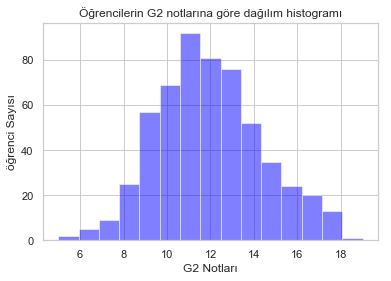

In [125]:
x = [alccon['G2']]
g2counts= alccon['G2'].value_counts()
g2labels = g2counts.axes[0].tolist()
num_bins = len(g2labels)
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('G2 Notları')
plt.ylabel('öğrenci Sayısı')
plt.title(r'Öğrencilerin G2 notlarına göre dağılım histogramı')
plt.show()


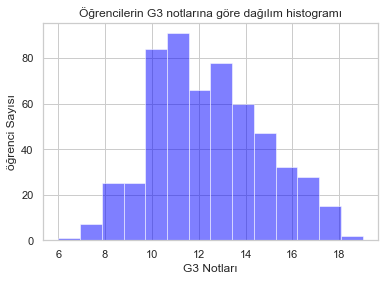

In [124]:
x = [alccon['G3']]
g3counts= alccon['G3'].value_counts()
g3labels = g3counts.axes[0].tolist()
num_bins = len(g3labels)
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('G3 Notları')
plt.ylabel('öğrenci Sayısı')
plt.title(r'Öğrencilerin G3 notlarına göre dağılım histogramı')
plt.show()


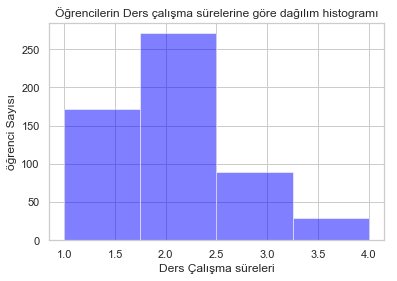

561


In [123]:
x = [alccon['studytime']]
studycounts= alccon['studytime'].value_counts()
studylabels = studycounts.axes[0].tolist()
num_bins = len(studylabels)
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Ders Çalışma süreleri')
plt.ylabel('öğrenci Sayısı')
plt.title(r'Öğrencilerin Ders çalışma sürelerine göre dağılım histogramı')
plt.show()
print(len(alccon['studytime']))


### <p style="color:red">Bölüm 4 - Veri Setinin İstatistik bilgileri </p>
 - Veriler tek bir dosyadan gelmektedir.
 - Verilerimin içinde missing valueler bulunmamaktadır.
 - Outlierleri tespit ederek veri setimizden çıkardım.
 - Data transformation metodlarından Label Encoding'i kullandım.

In [13]:
#Tipi obje olanlar tespit edilip cat.codes yardımıyla 0-n aralığına ( n : o özellikteki çeşit sayısı) dönüştürüldü
ObjectList = alccon.select_dtypes(include='object').columns
ObjectList

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [14]:
#Label Encoding
for x in ObjectList:
    alccon[x] = alccon[x].astype('category')
    alccon[x] =  alccon[x].cat.codes
    
    

In [15]:
alccon.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [16]:
alccon.drop(alccon.index[[279, 407, 413,61, 108, 136, 138, 141, 162, 178, 242, 262, 379, 385, 445, 458,
       459, 527, 631,18,  78, 131, 169, 170, 179, 237, 279, 478, 543, 557, 568, 571,
       610,25,  66, 108, 150, 198, 221, 299, 344, 369, 428, 433, 434, 453,
       454, 491, 502, 539, 563, 582, 601, 615, 646,29,  61,  66, 100, 143, 237, 250, 279, 379, 413, 447, 457, 500,
       523, 530, 576, 598,150, 155, 197, 212, 217, 253, 256, 325, 326, 397, 413,440, 563, 567, 597, 603, 605, 610,0,163, 172, 440, 519, 563, 567, 583, 586, 597, 603, 605, 610, 626,
       637, 639, 640]], inplace=True) # Outlierleri dropladık
alccontemp.drop(alccontemp.index[[279, 407, 413,61, 108, 136, 138, 141, 162, 178, 242, 262, 379, 385, 445, 458,
       459, 527, 631,18,  78, 131, 169, 170, 179, 237, 279, 478, 543, 557, 568, 571,
       610,25,  66, 108, 150, 198, 221, 299, 344, 369, 428, 433, 434, 453,
       454, 491, 502, 539, 563, 582, 601, 615, 646,29,  61,  66, 100, 143, 237, 250, 279, 379, 413, 447, 457, 500,
       523, 530, 576, 598,150, 155, 197, 212, 217, 253, 256, 325, 326, 397, 413,440, 563, 567, 597, 603, 605, 610,0,163, 172, 440, 519, 563, 567, 583, 586, 597, 603, 605, 610, 626,
       637, 639, 640]], inplace=True) # Outlierleri dropladık

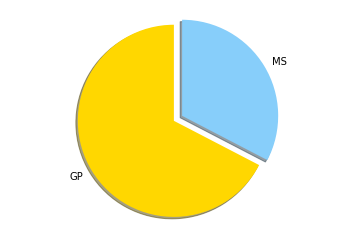

In [17]:
studentcounts = alccontemp['school'].value_counts()
templist= studentcounts.values.tolist() 
schoollabels = studentcounts.axes[0].tolist() 
counts = alccontemp['school'].value_counts().to_dict()
schoolnames= alccontemp['school'].value_counts()
labels = schoolnames.axes[0].tolist()
sizes = [counts.get("GP"), counts.get("MS")]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=90)

plt.axis('equal')
plt.show()

### <p style="color:red">Bölüm 5 - Görselleştirme </p>


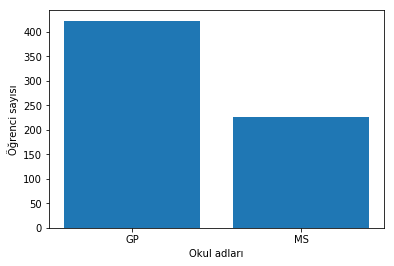

In [18]:

agecounts= alccon['school'].value_counts()
#agelabels = agecounts.axes[0].tolist() # bu sadece cinsiyetleri veriyor liste olarak ['F','M']
#a=agecounts.tolist() # a ise sayılarını veriyor  liste olarak [208,197]
x=["GP","MS"]
y = (a[0],a[1])
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Okul adları')
plt.ylabel('Öğrenci sayısı')
plt.show()


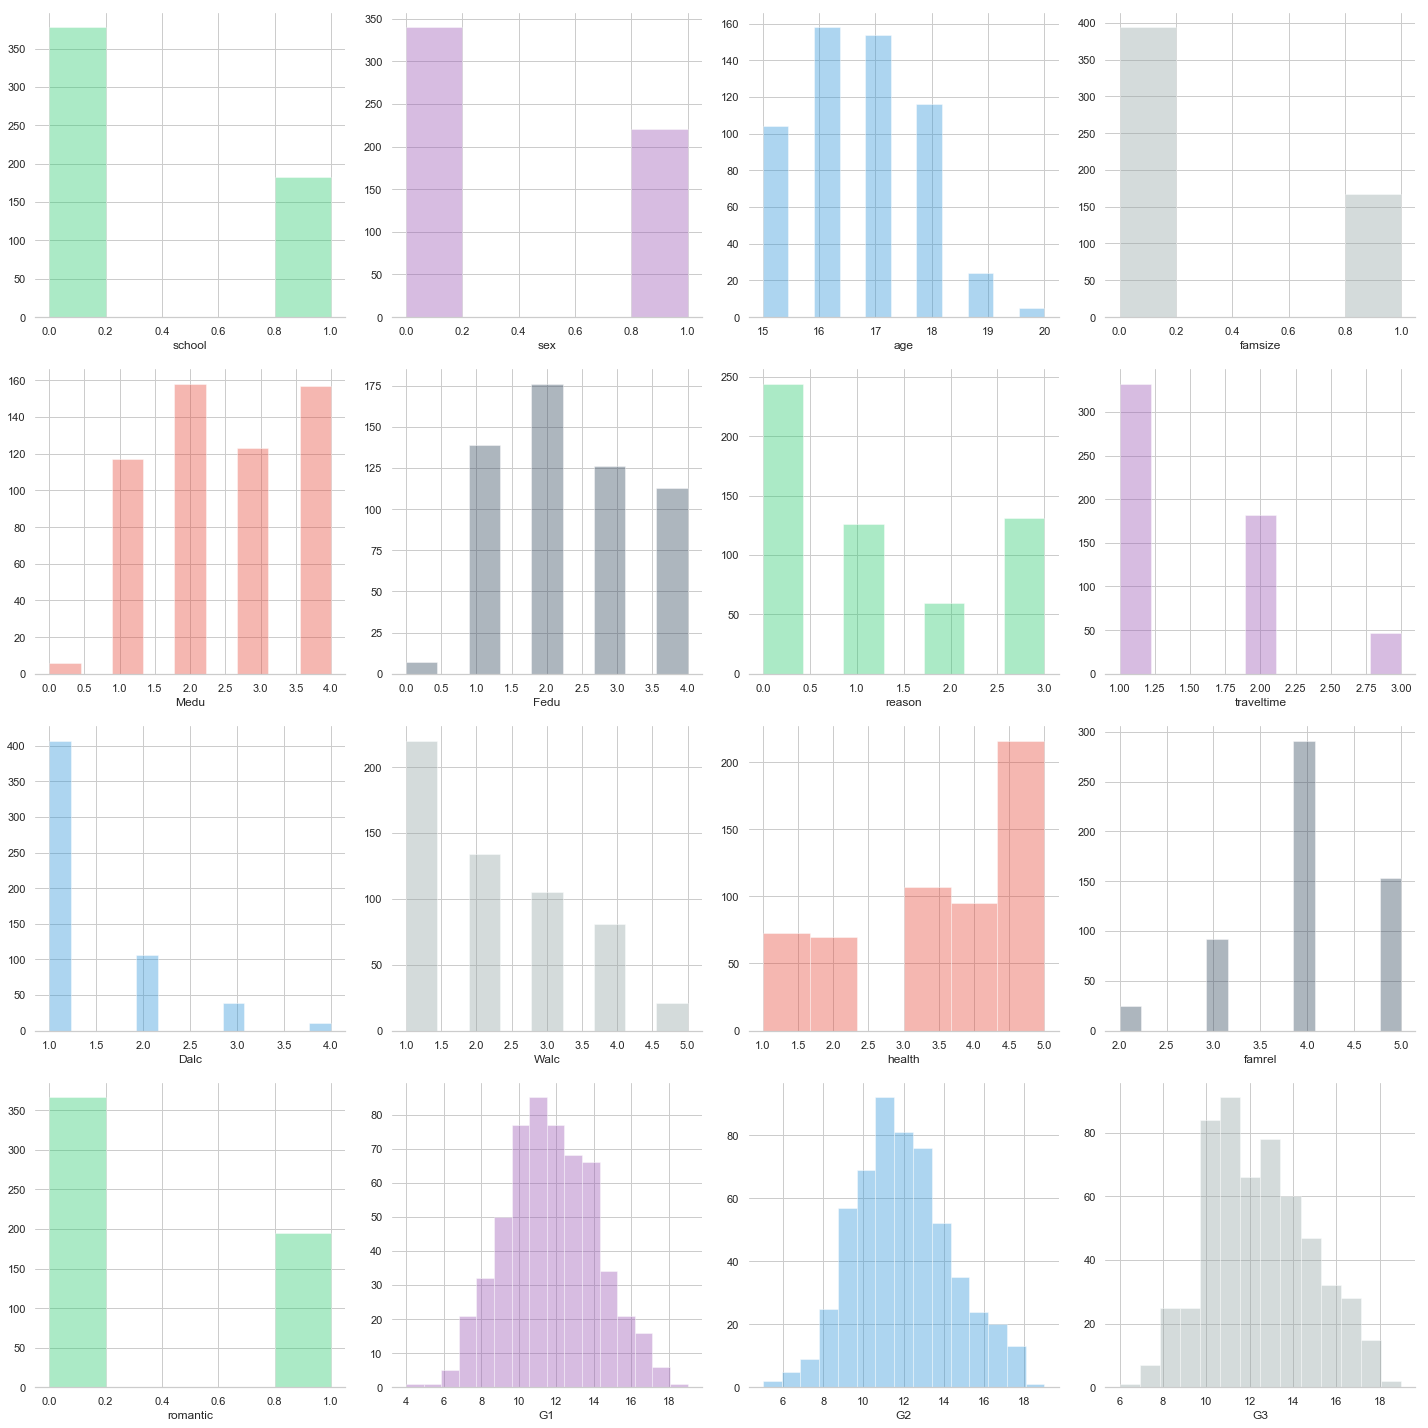

In [19]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
f, axes = plt.subplots(4, 4, figsize=(20,20))

sns.despine(left=True)
sns.distplot(alccon['school'],  kde=False, color="#2ecc71", ax=axes[0, 0])
sns.distplot(alccon['sex'],        kde=False, color="#9b59b6", ax=axes[0, 1])
sns.distplot(alccontemp['age'],        kde=False, color="#3498db", ax=axes[0, 2])
sns.distplot(alccon['famsize'],        kde=False, color="#95a5a6", ax=axes[0, 3])
sns.distplot(alccontemp['Medu'], kde=False, color="#e74c3c", ax=axes[1, 0])
sns.distplot(alccontemp['Fedu'],  kde=False, color="#34495e", ax=axes[1, 1])
sns.distplot(alccon['reason'],     kde=False, color="#2ecc71", ax=axes[1, 2])
sns.distplot(alccontemp['traveltime'],  kde=False, color="#9b59b6", ax=axes[1, 3])
sns.distplot(alccontemp['Dalc'],      kde=False, color="#3498db", ax=axes[2, 0])
sns.distplot(alccontemp['Walc'],      kde=False, color="#95a5a6", ax=axes[2, 1])
sns.distplot(alccontemp['health'],    kde=False, color="#e74c3c", ax=axes[2, 2])
sns.distplot(alccontemp['famrel'],    kde=False, color="#34495e", ax=axes[2, 3])
sns.distplot(alccon['romantic'],kde=False, color="#2ecc71", ax=axes[3, 0])
sns.distplot(alccontemp['G1'],       kde=False, color="#9b59b6", ax=axes[3, 1])
sns.distplot(alccontemp['G2'],      kde=False, color="#3498db", ax=axes[3, 2])
sns.distplot(alccontemp['G3'],      kde=False, color="#95a5a6", ax=axes[3, 3])
plt.tight_layout()

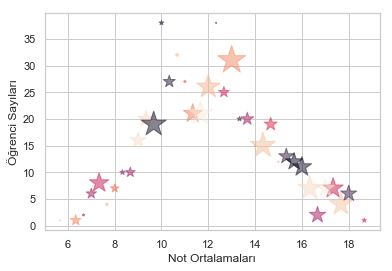

In [20]:
import matplotlib.pyplot

notort = (alccontemp['G1'] + alccontemp['G2']+ alccontemp['G3'])/3
notcounts= notort.value_counts()
notlabels = notcounts.axes[0].tolist() # bu sadece cinsiyetleri veriyor liste olarak ['F','M']
notcounts=notcounts.tolist() # a ise sayılarını 

N = len(notlabels)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  

plt.scatter(notlabels, notcounts, s=area, c=colors, alpha=0.5,marker="*")

plt.xlabel("Not Ortalamaları")
plt.ylabel("Öğrenci Sayıları")
plt.show()

1.0    216
1.5    107
2.0     87
2.5     66
3.0     42
3.5     26
4.0     13
4.5      4
dtype: int64
[216, 107, 87, 66, 42, 26, 13, 4]


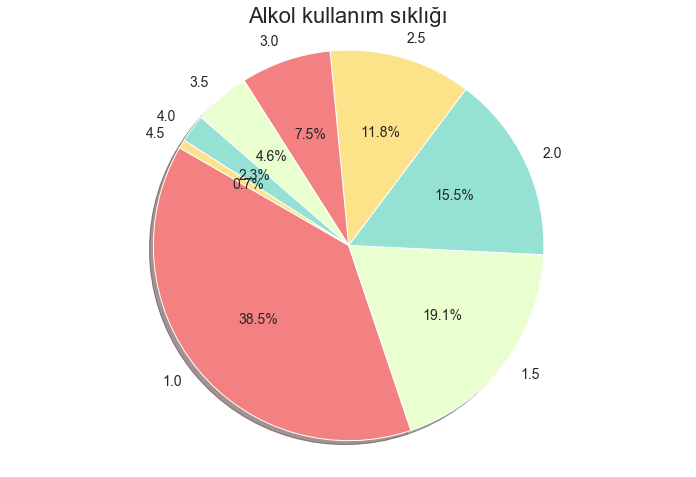

In [21]:
toplamalkol = (alccontemp['Dalc'] + alccontemp['Walc'])/2 # haftaiçi ve haftasonu içilen alkol miktarını toplayıp ortalama aldım
populations = toplamalkol.value_counts() 
print(populations)
pop_size = populations.values.tolist()
pop_types = populations.axes[0].tolist() 

print(pop_size)
# Plottaki kenarların adlandırılması ve renklendirme
pop_labels = pop_types
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A']
explode = (0, 0, 0, 0,0, 0, 0, 0)  
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Alkol kullanım sıklığı', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

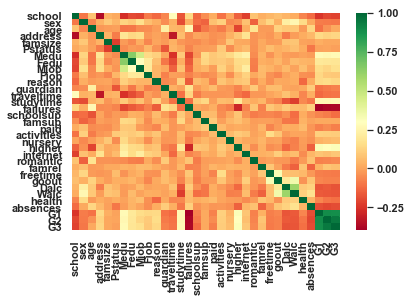

In [327]:

corr = alccon.corr()
sns.heatmap(corr, cmap='RdYlGn',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#Çok karmaşık analiz için pek yeterli değil. Daha sonra tekrar bakacağız.

ages
16    158
17    154
18    116
15    104
19     24
20      5
Name: age, dtype: int64
agetypes
[16, 17, 18, 15, 19, 20]


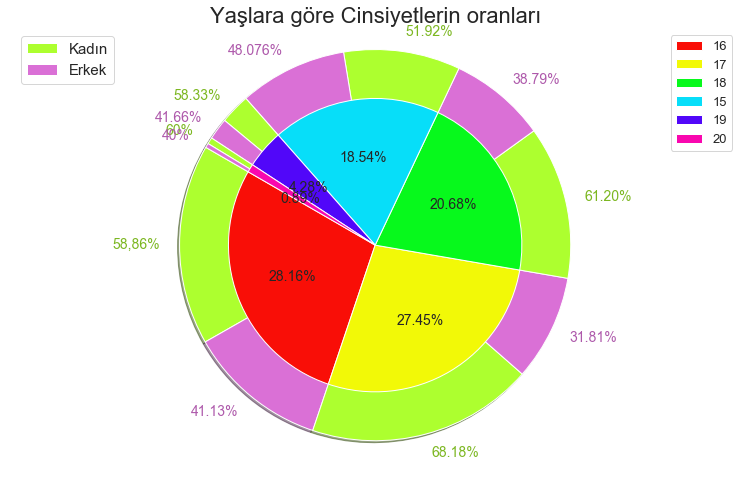

In [25]:
#yaş - cinsiyet age-sex
male_pop = [] #poisonous_pop
female_pop = []    #edible_pop
ages = alccontemp['age'].value_counts() # her özelliğe karşı gelen sayılar 
print("ages")
print(ages)
age_size = ages.values.tolist() #Popülasyondaki rakamsal verileri hesaplıyor
age_types = ages.axes[0].tolist() # popülasyondaki özellikleri liste olarak aktarıyor
print("agetypes")
print(age_types)
for pop in age_types: 
    size = len(alccontemp[alccontemp['age']== pop].index) #15 yasında kac kisi oldugu 
    females = len(alccontemp[(alccontemp['age']== pop) & (alccontemp['sex'] == 'F')].index) #edibles -> females 15 yasında kac kadın
    female_pop.append(females) 
    male_pop.append(size-females) 
combine_fem_mal = [] #combine_ed_poi
for i in range(0,len(female_pop)): 
    combine_fem_mal.append(female_pop[i])
    combine_fem_mal.append(male_pop[i])

#16   41,13  58,86
#17    31,81      68,18
#18    38,79     61,20
#15  48,076    51,92
#19  41,66 58,33
#20  40   60

fig = plt.subplots(figsize=(13,8))
plt.title('Yaşlara göre Cinsiyetlerin oranları', fontsize=22)
percentages_e_p = ['58,86%','41.13%','68.18%', '31.81%','61.20%','38.79%','51.92%','48.076%','58.33%','41.66%','60%','40%' ] 
#===İlk pasta ===
patches1, texts1 = plt.pie(combine_fem_mal,radius = 2, labels= percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') 
    else:
        texts1[i].set_color('#AE59AB') 
    texts1[i].set_fontsize(14)        
#===İkinci Pasta===#colors=colors
patches2, texts2, autotexts2 = plt.pie(age_size, colors=["#F90E07","#F2F907","#07F91C","#07DEF9","#5107F9","#F907AF"], radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  
    aut.set_horizontalalignment('center') 

first_legend   = plt.legend(patches1, ['Kadın','Erkek'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, age_types, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) 

plt.axis('equal')
plt.show()

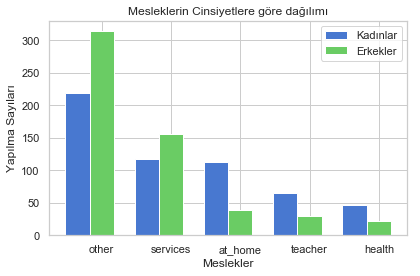

In [26]:
import numpy as np
import matplotlib.pyplot as plt


# data to plot
jobcounts= alccontemp['Mjob'].value_counts()
joblabels = jobcounts.axes[0].tolist() # bu sadece cinsiyetleri veriyor liste olarak ['F','M']
jobcounts=jobcounts.tolist() # a ise sayılarını veriyor  liste olarak [208,197]

jobcounts2= alccontemp['Fjob'].value_counts()
joblabels2 = jobcounts2.axes[0].tolist() # bu sadece cinsiyetleri veriyor liste olarak ['F','M']
jobcounts2=jobcounts2.tolist() # a ise sayılarını veriyor  liste olarak [208,197]

n_groups = len(joblabels)
femalejobs = (jobcounts)
malejobs = (jobcounts2)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = plt.bar(index, femalejobs, bar_width,
alpha=opacity,
color='b',
label='Kadınlar')

rects2 = plt.bar(index + bar_width, malejobs, bar_width,
alpha=opacity,
color='g',
label='Erkekler')

plt.xlabel('Meslekler')
plt.ylabel('Yapılma Sayıları')
plt.title('Mesleklerin Cinsiyetlere göre dağılımı')
plt.xticks(index + bar_width, (joblabels))
plt.legend()

plt.tight_layout()
plt.show()
#meslekler - meslek sayıları - cinsiyetler
#yaşlar - yaş sayıları - cinsiyetler

In [27]:
def autolabel(rects,fontsize=14):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

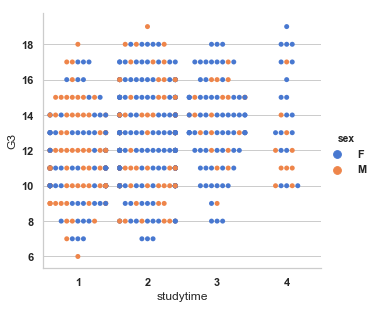

In [148]:
sns.catplot(x="studytime", y="G3", hue="sex", kind="swarm", data=alccontemp)



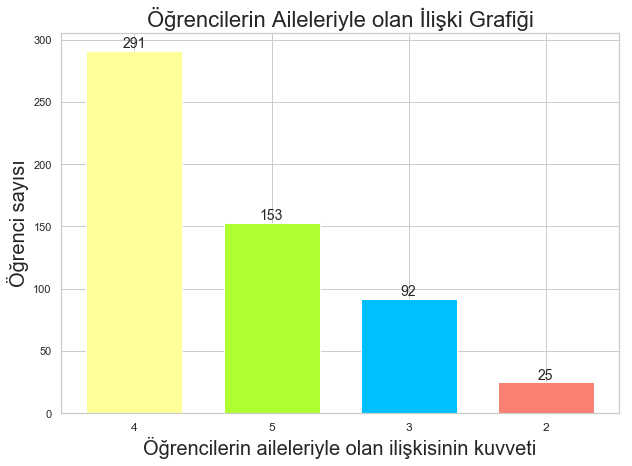

In [29]:
#çocukların aile ile olan ilişkileri


relcounts = alccontemp['famrel'].value_counts() 
relcountslist = relcounts.values.tolist()  #tüm değerler 
rellabels = relcounts.axes[0].tolist()  


width = 0.7 
ind = np.arange(4)  # x eksenindeki grup sayısı
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, relcountslist , width, color=colors)

#kenarların ısımlendirilmesi
ax.set_xlabel("Öğrencilerin aileleriyle olan ilişkisinin kuvveti",fontsize=20)
ax.set_ylabel('Öğrenci sayısı',fontsize=20)
ax.set_title('Öğrencilerin Aileleriyle olan İlişki Grafiği',fontsize=22)
ax.set_xticks(ind) #tüm eksenlerin gösterilmesi
ax.set_xticklabels(('4', '5','3','2'),
                  fontsize = 12)

autolabel(odor_bars)        
plt.show() 

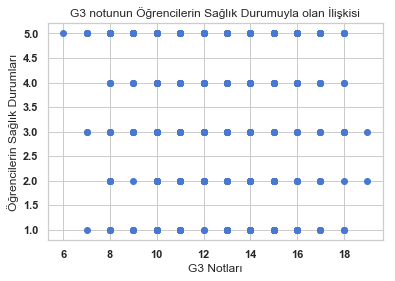

In [149]:
#notların sağlıkla olan ilişkisi

dizi1 = []

for x in alccontemp['G3']:
    dizi1.append(x)


dizi2=[]
for x in alccontemp['health']:
    dizi2.append(x)
    


plt.scatter(dizi1,dizi2)
plt.title("G3 notunun Öğrencilerin Sağlık Durumuyla olan İlişkisi")
plt.xlabel("G3 Notları")
plt.ylabel("Öğrencilerin Sağlık Durumları")
plt.show()

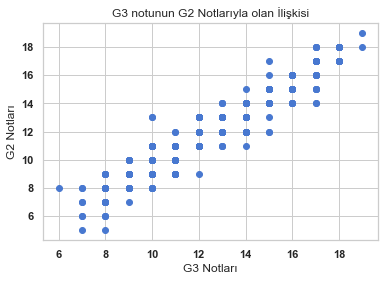

In [151]:
dizi1 = []

for x in alccontemp['G3']:
    dizi1.append(x)


dizi2=[]
for x in alccontemp['G2']:
    dizi2.append(x)
    


plt.scatter(dizi1,dizi2)
plt.title("G3 notunun G2 Notlarıyla olan İlişkisi")
plt.xlabel("G3 Notları")
plt.ylabel("G2 Notları")
plt.show()

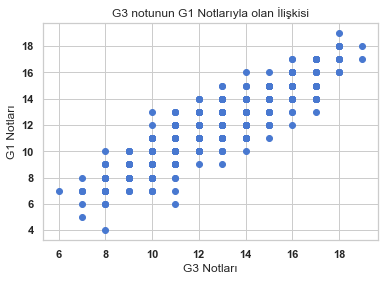

In [152]:
dizi1 = []

for x in alccontemp['G3']:
    dizi1.append(x)


dizi2=[]
for x in alccontemp['G1']:
    dizi2.append(x)
    


plt.scatter(dizi1,dizi2)
plt.title("G3 notunun G1 Notlarıyla olan İlişkisi")
plt.xlabel("G3 Notları")
plt.ylabel("G1 Notları")
plt.show()
#Aralarındaki pozitif korelasyon görülüyor :) 

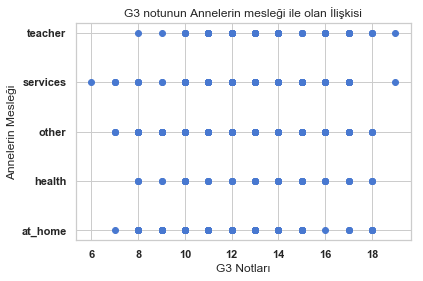

In [156]:
dizi1 = []

for x in alccontemp['G3']:
    dizi1.append(x)


dizi2=[]
for x in alccontemp['Mjob']:
    dizi2.append(x)
    


plt.scatter(dizi1,dizi2)
plt.title("G3 notunun Annelerin mesleği ile olan İlişkisi")
plt.xlabel("G3 Notları")
plt.ylabel("Annelerin Mesleği")
plt.show()
#Etkisi yok.

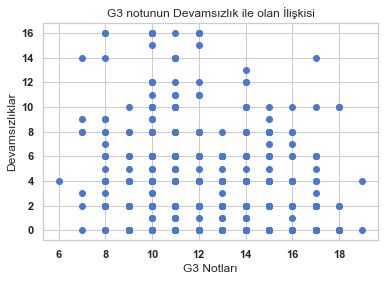

In [159]:
dizi1 = []

for x in alccontemp['G3']:
    dizi1.append(x)


dizi2=[]
for x in alccontemp['absences']:
    dizi2.append(x)
    


plt.scatter(dizi1,dizi2)
plt.title("G3 notunun Devamsızlık ile olan İlişkisi")
plt.xlabel("G3 Notları")
plt.ylabel("Devamsızlıklar")
plt.show()

### <p style="color:red">Bölüm 6 - Makine Öğrenmesi Uygulamaları </p>
- Final notlarının tahmini için regresyon kullandım.
- Kullanılan regresyon yöntemleri : Lineer Reg. , Logistik Reg,  Bayesian Ridge ve Ensemble olarak da Gradient Boosting Regs.
- Kullanılan feature selection yöntemleri : LarsCv, LassoCV, RidgeCV, RFECV
- Değerlendirme metriği olarak R-square kullandım.
- Accuracy ve 5-fold Cv için R2 ve Negativ MSE değerleri aşağıdaki gibidir
- Evaluation metrics: 
- Feature selection kısmında Accuracy, R2, Negative mse değerlerine
- Regresyon kısmında ise Accuracy , Rmse ve R2 değerlerine baktım.


 

 


In [34]:
#Önce hiç bir şey yapmadan regresyon sonuçlarına bakalım
import statsmodels.formula.api as smf 
newdf = alccon.copy()
X = newdf[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']]
y = newdf['G3']

reg = smf.ols('G3 ~ school+ sex+ age+ address+ famsize+ Pstatus+ Medu+ Fedu+Mjob+ Fjob+ reason+ guardian+ traveltime+ studytime+failures+ schoolsup+ famsup+ paid+ activities+ nursery+ higher+ internet+ romantic+ famrel+ freetime+ goout+ Dalc+ Walc+ health+ absences+ G1+ G2', data=alccon).fit()
print (reg.summary())
# R2 değerimiz yüksek , Listedeki özelliklerin yarısından fazlası negatif korelasyon tarafında ancak değerleri 0 'a çok yakın.

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     183.0
Date:                Mon, 13 May 2019   Prob (F-statistic):          1.16e-262
Time:                        07:18:55   Log-Likelihood:                -630.12
No. Observations:                 561   AIC:                             1326.
Df Residuals:                     528   BIC:                             1469.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0096      0.628     -1.607      0.1

In [37]:
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
regr2 = linear_model.LinearRegression()

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)
scoresR2= cross_val_score(regr2, X, y, cv=5, scoring='r2') 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())

scoresMSE= cross_val_score(regr2, X, y, cv=5, scoring='neg_mean_squared_error') 
print(" Neg Mean Squared Errors: "+ str(list(scoresMSE)))
print('Neg Mean:%.2f' %scoresMSE.mean())
#r2 değeri gayet iyi. şimdide fs deneyelim.

R2 scores: [0.8548766118313443, 0.8897861567663232, 0.8545128041092102, 0.9171852002548645, 0.920600274671952]
r2_score: 0.89
 Neg Mean Squared Errors: [-0.5580584701900957, -0.5628778422291351, -1.037895263542331, -0.5586764029681601, -0.7344221404944796]
Neg Mean:-0.69


# Feature Selection

In [39]:
#LarsCv için parametre seçimi
from sklearn.linear_model import LarsCV
from sklearn.model_selection import GridSearchCV


X = newdf[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

nalpha = [500,1000,2000,5000,6000]
iters = [500,1000,2000,5000,10000]

tuned_parameters = [{'max_n_alphas': nalpha,"max_iter" : iters}]
clf=LarsCV()
grid_clf_acc = GridSearchCV(clf, param_grid = tuned_parameters, cv= 5)


grid_clf_acc.fit(X,y)
print('Grid best parameters: ', grid_clf_acc.get_params)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameters:  <bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LarsCV(copy_X=True, cv='warn', eps=2.220446049250313e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
    positive=False, precompute='auto', verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_n_alphas': [500, 1000, 2000, 5000, 6000], 'max_iter': [500, 1000, 2000, 5000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>
Grid best score (accuracy):  0.8935276556354751


In [40]:
#LARSCV KULLANARAK 5-FOLD CV


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

regr = LarsCV( max_n_alphas=1000,cv=5,max_iter=500,n_jobs=-1).fit(X,y)
regr

LarsCV(copy_X=True, cv=5, eps=2.220446049250313e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=-1, normalize=True,
    positive=False, precompute='auto', verbose=False)

In [41]:
#Bulunan kolonların coef matrisi yardımıyla çıkarılması
coeff_used = np.sum(regr.coef_!=0)
print(coeff_used)
abc = [X.columns]
print(type(abc))
collist2=[]
temp=y
for x in range(0,32):
    collist2.append(abc[0][x])
featurelist=[]
for (x,temp) in zip(collist2,regr.coef_):
    if temp != 0:
        featurelist.append(x)
print(featurelist)


7
<class 'list'>
['age', 'Mjob', 'schoolsup', 'higher', 'Dalc', 'G1', 'G2']


In [42]:

from sklearn import linear_model
X = newdf[['age', 'Mjob', 'schoolsup', 'higher', 'Dalc', 'G1', 'G2']]
scoresR2= cross_val_score(regr2, X, y, cv=5, scoring='r2') 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())

scoresMSE= cross_val_score(regr2, X, y, cv=5, scoring='neg_mean_squared_error') 
print(" Neg Mean Squared Errors: "+ str(list(scoresMSE)))
print('Neg Mean:%.2f' %scoresMSE.mean())


R2 scores: [0.8787247277132996, 0.9043470348413725, 0.8731195900602055, 0.920503372333696, 0.9272916056144603]
r2_score: 0.90
 Neg Mean Squared Errors: [-0.46635276214437843, -0.4885133577744191, -0.90515578162407, -0.5362917030457313, -0.6725294629915013]
Neg Mean:-0.61


In [43]:
#LassoCv için parametre seçimi
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

nalpha = [25,50,75,100,150]
iters = [1000,2000,5000,10000]

tuned_parameters = [{'n_alphas': nalpha,"max_iter" : iters}]
clf=LassoCV()
grid_clf_acc = GridSearchCV(clf, param_grid = tuned_parameters, cv= 5)


grid_clf_acc.fit(X,y)
print('Grid best parameters: ', grid_clf_acc.get_params)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameters:  <bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_alphas': [25, 50, 75, 100, 150], 'max_iter': [1000, 2000, 5000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>
Grid best score (accuracy):  0.8993189588114188


In [44]:
#LASSOCV KULLANARAK 5FOLD CV

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

regr = LassoCV(n_alphas=100,cv=5,max_iter=1000,n_jobs=8).fit(X,y)
regr

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=8, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [46]:
coeff_used = np.sum(regr.coef_!=0)
print(coeff_used)
abc = [X.columns]
print(type(abc))
collist2=[]
temp=y
for x in range(0,7):
    collist2.append(abc[0][x])
featurelist=[]
for (x,temp) in zip(collist2,regr.coef_):
    if temp != 0:
        featurelist.append(x)
print(featurelist)
# feat sel. sonucu bulunan özellikleri ortaya cıkarmak için yazdığım kod.

7
<class 'list'>
['age', 'Mjob', 'schoolsup', 'higher', 'Dalc', 'G1', 'G2']


In [47]:

X = newdf[['age', 'Medu', 'Mjob', 'Walc', 'health', 'absences', 'G1', 'G2']]
scoresR2= cross_val_score(regr2, X, y, cv=5, scoring='r2') 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())

scoresMSE= cross_val_score(regr2, X, y, cv=5, scoring='neg_mean_squared_error') 
print("Neg Mean Squared Errors: "+ str(list(scoresMSE)))
print('Neg Mean:%.2f' %scoresMSE.mean())
#r2 0.90 mean = -0.63

R2 scores: [0.8662029373286332, 0.899037400833706, 0.8718828538482064, 0.920858575049007, 0.9279740662711702]
r2_score: 0.90
Neg Mean Squared Errors: [-0.5145041405974984, -0.5156304171707157, -0.9139785694221703, -0.5338954722279878, -0.6662169195383181]
Neg Mean:-0.63


In [49]:
#RidgeCV için parametre seçimi
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


X = newdf[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

alphas = [1,2,3,4,5]
iters = [500,1000,5000,10000]

tuned_parameters = [{'alpha': alphas,'max_iter':iters}]
clf=Ridge()

grid_clf_acc = GridSearchCV(clf, param_grid = tuned_parameters, cv= 5)


grid_clf_acc.fit(X,y)
print('Grid best parameters: ', grid_clf_acc.get_params)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameters:  <bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [1, 2, 3, 4, 5], 'max_iter': [500, 1000, 5000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>
Grid best score (accuracy):  0.8881387069633794


In [50]:
#RİDGE KULLANARAK 

X = newdf[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

regr = Ridge(alpha=1.0, max_iter=None).fit(X,y)
regr

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
coeff_used = np.sum(regr.coef_!=0)
print(coeff_used)
abc = [X.columns]
print(type(abc))
collist2=[]
temp=y
for x in range(0,32):
    collist2.append(abc[0][x])
featurelist=[]
for (x,temp) in zip(collist2,regr.coef_):
    if temp != 0:
        featurelist.append(x)
print(featurelist)

32
<class 'list'>
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
X = newdf[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']]

scoresR2= cross_val_score(regr2, X, y, cv=5, scoring='r2') 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())


scoresMSE= cross_val_score(regr2, X, y, cv=5, scoring='neg_mean_squared_error') 
print("Neg Mean Squared Errors: "+ str(list(scoresMSE)))
print('Neg Mean:%.2f' %scoresMSE.mean()) #0.89 -0,69

R2 scores: [0.8548766118313443, 0.8897861567663232, 0.8545128041092102, 0.9171852002548645, 0.920600274671952]
r2_score: 0.89
Neg Mean Squared Errors: [-0.5580584701900957, -0.5628778422291351, -1.037895263542331, -0.5586764029681601, -0.7344221404944796]
Neg Mean:-0.69


## RFECV

In [92]:

X = newdf[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']]

rfecv = RFECV(estimator=regr, cv=5, scoring='r2',n_jobs=-1)
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.support_)
print(rfecv.grid_scores_)



Optimal number of features : 11
[ True False  True False False  True False False False False False False
 False False  True  True False  True False  True  True  True False False
 False False False False False False  True  True]
[0.88910431 0.88836565 0.88742588 0.8866406  0.88375714 0.88329118
 0.88896581 0.88735228 0.88655934 0.89101827 0.89213896 0.89062478
 0.88849428 0.8878009  0.88820842 0.88790337 0.88779638 0.88790258
 0.88826299 0.88716597 0.88716412 0.88705145 0.8871664  0.88701261
 0.88689524 0.88691997 0.88725663 0.88717302 0.88713197 0.88723178
 0.88721883 0.88739221]


In [93]:
from sklearn.model_selection import cross_val_score
regr1 = linear_model.LinearRegression()


X = newdf[['school','age','Pstatus','failures','schoolsup','paid','nursery','higher', 'internet','G1', 'G2']]


scoresMSE= cross_val_score(regr1, X, y, cv=5, scoring='neg_mean_squared_error') 
print("Neg Mean Squared Errors: "+ str(list(scoresMSE)))
print('Mean:%.2f' %scoresMSE.mean())

scoresR2= cross_val_score(regr1, X, y, cv=5, scoring='r2') 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())

Neg Mean Squared Errors: [-0.5165992068811056, -0.5076526318740368, -0.8753488716354799, -0.5592785537728645, -0.6922303543392029]
Mean:-0.63
R2 scores: [0.865658114279157, 0.9005994846680208, 0.8772977801962781, 0.9170959410736229, 0.9251617060982611]
r2_score: 0.90


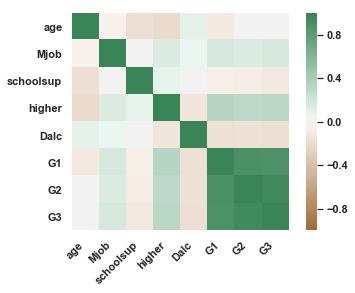

In [332]:
X = newdf[['age', 'Mjob', 'schoolsup', 'higher', 'Dalc', 'G1', 'G2',"G3"]]
# -1 negatif ilişki
# +1 pozitif ilişki
#0 ilişki yok
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(40, 500, n=400),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#G1 , G2, higher  Pozitif Korelasyon -> G3
#schoolsup negatif korelasyon-> G3
#age ,dalc , mjob  özelliklerinin ilişkisi yok denilebilir . Emin olmak için modelde deneyelim.


# Regresyon modelini oluşturma


In [339]:
#üstteki kor . matrisinde ilişkisi olmayabilir dediklerimizi çıkardık

reg = smf.ols('G3 ~  schoolsup + higher +  G1+ G2', data=alccon).fit()
reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1399.
Date:                Mon, 13 May 2019   Prob (F-statistic):          1.43e-288
Time:                        11:49:52   Log-Likelihood:                -654.94
No. Observations:                 561   AIC:                             1320.
Df Residuals:                     556   BIC:                             1342.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8682      0.171      5.082      0.000       0.533       1.204
schoolsup     -0.3713      0.108     -3.445      0.001      -0.583      -0.160
higher         0.2410      0.125      1.923      0.055      -0.005       0.487
G1             0.1981      0.028      6.990      0.000       0.142       0.254
G2             0.7569      0.028     26.927      0.000       0.702       0.812
==============================================================================
Omnibus:                        9.403   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               12.367
Skew:                           0.166   Prob(JB):                      0.00206
Kurtosis:                       3.647   Cond. No.                         94.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
# Yorum : 7 kolondan oluşan bu model bütün datadaki değişikliğin %91.4'ünü açıklamaktadır.
# Bu rakam veri setimiziin seçilen model için oldukça tutarlı olduğunu göstermektedir.
#Age 1 artarsa G3 0.1402 artarken , Schoolsup 1 arttığında G3 0.3010 azalacaktır.

reg = smf.ols('G3 ~ age+ Mjob + schoolsup + higher + Dalc+ G1+ G2', data=alccon).fit()
reg.summary()
#Baktığımızda age için yine de çok az da olsa pozitif korelasyon denebilir ancak  Mjob değeri 0 a yakın bir de Mjobu cıkartıp deneyelim

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     844.4
Date:                Mon, 13 May 2019   Prob (F-statistic):          1.78e-290
Time:                        11:51:51   Log-Likelihood:                -639.62
No. Observations:                 561   AIC:                             1295.
Df Residuals:                     553   BIC:                             1330.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4561      0.535     -2.720      0.007      -2.508      -0.404
age            0.1402      0.029      4.859      0.000       0.084       0.197
Mjob           0.0647      0.026      2.451      0.015       0.013       0.116
schoolsup     -0.3010      0.107     -2.822      0.005      -0.511      -0.092
higher         0.3015      0.125      2.413      0.016       0.056       0.547
Dalc          -0.0918      0.048     -1.923      0.055      -0.186       0.002
G1             0.2106      0.028      7.514      0.000       0.156       0.266
G2             0.7383      0.028     26.658      0.000       0.684       0.793
==============================================================================
Omnibus:                        7.041   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                9.601
Skew:                           0.086   Prob(JB):                      0.00823
Kurtosis:                       3.617   Cond. No.                         400.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:

reg = smf.ols('G3 ~ age + schoolsup + higher + Dalc+ G1+ G2', data=alccon).fit()
reg.summary()
#R2 değeri aynı kaldı. Dolayısıyla mjobun cidden r2 değerine bir etkisi olmadığını göstermiş olduk.
#Dolayısıyla Modelimize [age + schoolsup + higher + Dalc+ G1+ G2'] olarak devam edeceğiz.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     975.4
Date:                Mon, 13 May 2019   Prob (F-statistic):          1.08e-290
Time:                        11:52:28   Log-Likelihood:                -642.65
No. Observations:                 561   AIC:                             1299.
Df Residuals:                     554   BIC:                             1330.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3973      0.537     -2.601      0.010      -2.453      -0.342
age            0.1388      0.029      4.788      0.000       0.082       0.196
schoolsup     -0.2956      0.107     -2.759      0.006      -0.506      -0.085
higher         0.3298      0.125      2.638      0.009       0.084       0.575
Dalc          -0.0811      0.048     -1.697      0.090      -0.175       0.013
G1             0.2155      0.028      7.676      0.000       0.160       0.271
G2             0.7378      0.028     26.519      0.000       0.683       0.792
==============================================================================
Omnibus:                        6.592   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                8.602
Skew:                           0.097   Prob(JB):                       0.0136
Kurtosis:                       3.575   Cond. No.                         398.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [347]:

X = newdf[['age','schoolsup', 'higher', 'Dalc', 'G1', 'G2']]
y = newdf['G3']


In [348]:
predictions = reg.predict(X)
difference = reg.resid
df = pd.DataFrame({'Tahminler': predictions, 'G3': y,"Aradakifark": difference})

In [349]:
df

,Aradakifark,G3,Tahminler
1,-0.265348,11,11.265348
2,-0.733256,12,12.733256
3,-0.278678,14,14.278678
4,-0.033131,13,13.033131
5,0.489105,13,12.510895
6,0.273587,13,12.726413
7,0.339178,13,12.660822
8,1.030293,17,15.969707
9,0.627869,13,12.372131
10,-0.278678,14,14.278678


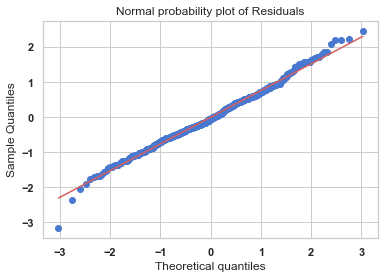

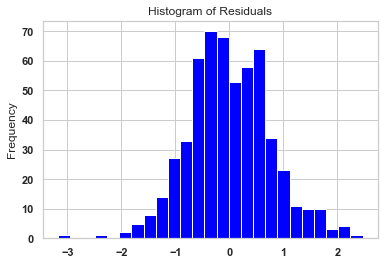

<Figure size 432x288 with 0 Axes>

In [350]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import matplotlib.pyplot as plt1

stats.probplot(reg.resid, plot= plt)
plt.title("Normal probability plot of Residuals")
plt.ylabel('Sample Quantiles')
fig1=plt.figure()

num_bins =25
n, bins, patches = plt.hist(reg.resid, num_bins, facecolor='blue', alpha=1)
plt.title("Histogram of Residuals")
plt.ylabel('Frequency')
fig2=plt.figure()

plt.show() 

In [351]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = newdf[['age','schoolsup', 'higher', 'Dalc', 'G1', 'G2']]
y = newdf['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(random_state=50,penalty='l1',max_iter=5000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=50, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [352]:
logpred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

scoresR2= cross_val_score(logreg , X, y, cv=5, scoring='r2') 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())


scoresMSE= cross_val_score(logreg , X, y, cv=5, scoring='neg_mean_squared_error') 
print("Neg Mean Squared Errors: "+ str(list(scoresMSE)))
print('Neg Mean:%.2f' %scoresMSE.mean()) 

Accuracy of logistic regression classifier on test set: 0.30


C:\Users\Tolga\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


R2 scores: [0.6155892286081474, 0.7285338564684071, 0.632218806692199, 0.5458333333333334, 0.7586787093995234]
r2_score: 0.66


C:\Users\Tolga\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Neg Mean Squared Errors: [-2.7711864406779663, -1.9043478260869566, -2.369369369369369, -2.889908256880734, -1.537037037037037]
Neg Mean:-2.29


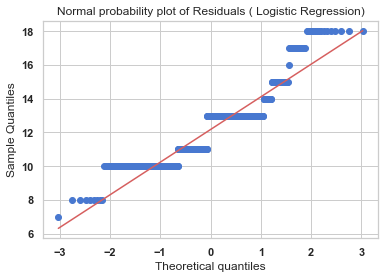

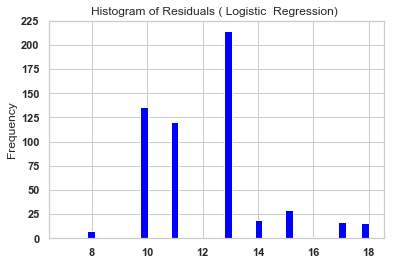

<Figure size 432x288 with 0 Axes>

In [353]:
logpred = logreg.predict(X)
stats.probplot(logpred, plot= plt)
plt.title("Normal probability plot of Residuals ( Logistic Regression)")
plt.ylabel('Sample Quantiles')
fig1=plt.figure()

num_bins =40
n, bins, patches = plt.hist(logpred, num_bins, facecolor='blue', alpha=1)
plt.title("Histogram of Residuals ( Logistic  Regression) ")
plt.ylabel('Frequency')
fig2=plt.figure()

plt.show() 

In [369]:
#linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = newdf[['age','schoolsup', 'higher', 'Dalc', 'G1', 'G2']]
y = newdf['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [370]:
y_pred = linreg.predict(X_test)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

scoresR2= cross_val_score(linreg , X, y, cv=5, scoring='r2') 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())


scoresMSE= cross_val_score(linreg , X, y, cv=5, scoring='neg_mean_squared_error') 
print("Neg Mean Squared Errors: "+ str(list(scoresMSE)))
print('Neg Mean:%.2f' %scoresMSE.mean()) #0.89 -0,69

Accuracy of linear regression classifier on test set: 0.92
R2 scores: [0.8767016658364349, 0.9059592677788939, 0.8750771578309855, 0.919089722657974, 0.9255099466104704]
r2_score: 0.90
Neg Mean Squared Errors: [-0.4741322581329293, -0.4802794538435059, -0.8911906329735944, -0.5458283162878087, -0.6890092406473485]
Neg Mean:-0.62


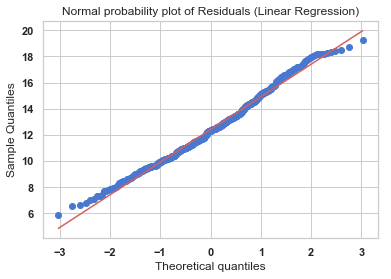

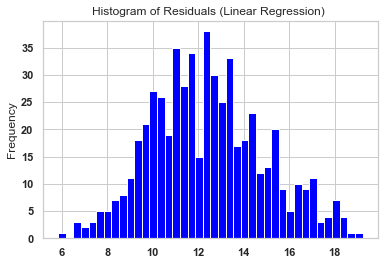

<Figure size 432x288 with 0 Axes>

In [356]:
linpred = linreg.predict(X)


stats.probplot(linpred, plot= plt)
plt.title("Normal probability plot of Residuals (Linear Regression)")
plt.ylabel('Sample Quantiles')
fig1=plt.figure()

num_bins =40
n, bins, patches = plt.hist(linpred, num_bins, facecolor='blue', alpha=1)
plt.title("Histogram of Residuals (Linear Regression) ")
plt.ylabel('Frequency')
fig2=plt.figure()

plt.show() 

In [367]:
#Bayessian Ridge
from sklearn.linear_model import BayesianRidge
from sklearn import metrics

X = newdf[['age','schoolsup', 'higher', 'Dalc', 'G1', 'G2']]
y = newdf['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
bayreg = BayesianRidge(n_iter = 1000,tol=0.1)
bayreg.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=1000,
       normalize=False, tol=0.1, verbose=False)

In [368]:
bayespred = bayreg.predict(X_test)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(bayreg.score(X_test, y_test)))

scoresR2= cross_val_score(bayreg , X, y, cv=5, scoring='r2') 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())


scoresMSE= cross_val_score(bayreg , X, y, cv=5, scoring='neg_mean_squared_error') 
print("Neg Mean Squared Errors: "+ str(list(scoresMSE)))
print('Neg Mean:%.2f' %scoresMSE.mean()) #0.89 -0,69


Accuracy of linear regression classifier on test set: 0.92
R2 scores: [0.875452074958708, 0.9059441638571718, 0.8749033614440022, 0.9195014174780295, 0.9260618267796357]
r2_score: 0.90
Neg Mean Squared Errors: [-0.4789374434472176, -0.48035659172944395, -0.8924304839843059, -0.5430509844353244, -0.6839045250647665]
Neg Mean:-0.62


In [359]:

scoresR2= cross_val_score(bayreg , X, y, cv=5, scoring='r2') 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())


scoresMSE= cross_val_score(bayreg , X, y, cv=5, scoring='neg_mean_squared_error') 
print("Neg Mean Squared Errors: "+ str(list(scoresMSE)))
print('Neg Mean:%.2f' %scoresMSE.mean()) #0.89 -0,69

R2 scores: [0.8771979527147054, 0.9042853454177258, 0.8729640009413688, 0.9209691330943326, 0.927946828310446]
r2_score: 0.90
Neg Mean Squared Errors: [-0.4722238331742924, -0.48882841447375747, -0.9062657432843423, -0.533149637289405, -0.6664688619894438]
Neg Mean:-0.61


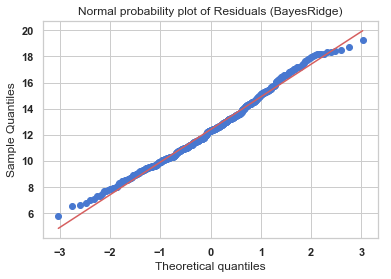

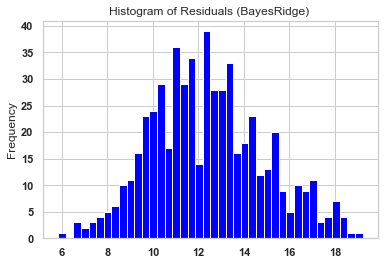

<Figure size 432x288 with 0 Axes>

In [360]:
bayespred = bayreg.predict(X)


stats.probplot(bayespred, plot= plt)
plt.title("Normal probability plot of Residuals (BayesRidge)")
plt.ylabel('Sample Quantiles')
fig1=plt.figure()

num_bins =40
n, bins, patches = plt.hist(bayespred, num_bins, facecolor='blue', alpha=1)
plt.title("Histogram of Residuals (BayesRidge) ")
plt.ylabel('Frequency')
fig2=plt.figure()

plt.show() 

In [375]:
parameters = {
    
    "learning_rate": [0.01, 0.025,0.099, 0.1, 0.15, 0.2],
    
    "max_depth":[2,3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10,30,60,90]
    }


X = newdf[['age', 'schoolsup', 'higher', 'Dalc', 'G1', 'G2']]
y = newdf['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=10, n_jobs=-1)
clf.fit(X_train,y_train)


C:\Users\Tolga\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.025, 0.099, 0.1, 0.15, 0.2], 'max_depth': [2, 3, 5, 8], 'max_features': ['log2', 'sqrt'], 'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0], 'n_estimators': [10, 30, 60, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [376]:
from sklearn.ensemble import GradientBoostingRegressor


X = newdf[['age','schoolsup', 'higher', 'Dalc', 'G1', 'G2']]
y = newdf['G3']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)
gradmodel= GradientBoostingRegressor(learning_rate=0.1,loss='ls',max_depth=3,subsample=1.0, tol=0.0001,min_samples_split=2,random_state=0, min_impurity_decrease=0.0) #0.8896
gradmodel.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [377]:
gradpred = gradmodel.predict(X_test)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(gradmodel.score(X_test, y_test)))

scoresR2= cross_val_score(gradmodel , X, y, cv=5, scoring='r2') 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())


scoresMSE= cross_val_score(gradmodel , X, y, cv=5, scoring='neg_mean_squared_error') 
print("Neg Mean Squared Errors: "+ str(list(scoresMSE)))
print('Neg Mean:%.2f' %scoresMSE.mean()) #0.89  90 -61


Accuracy of linear regression classifier on test set: 0.89
R2 scores: [0.8854467464842015, 0.9004549142306817, 0.8863549715461221, 0.9023311231722533, 0.9267615521262954]
r2_score: 0.90
Neg Mean Squared Errors: [-0.4405038651525363, -0.5083909737504473, -0.8107355154879327, -0.6588833995371816, -0.6774322887348686]
Neg Mean:-0.62


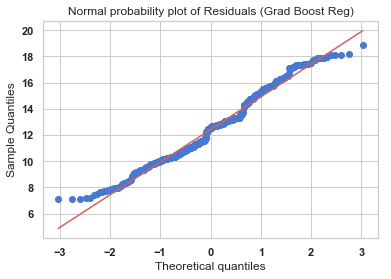

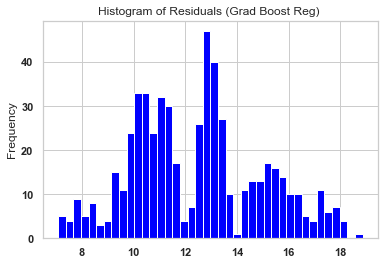

<Figure size 432x288 with 0 Axes>

In [378]:
gradpred = gradmodel.predict(X)


stats.probplot(gradpred, plot= plt)
plt.title("Normal probability plot of Residuals (Grad Boost Reg)")
plt.ylabel('Sample Quantiles')
fig1=plt.figure()

num_bins =40
n, bins, patches = plt.hist(gradpred, num_bins, facecolor='blue', alpha=1)
plt.title("Histogram of Residuals (Grad Boost Reg) ")
plt.ylabel('Frequency')
fig2=plt.figure()

plt.show() 

### <p style="color:red">Bölüm 7 - Sonuçlar </p>
- Final notlarının tahmini için regresyon kullandım.
- Değerlendirme metriği olarak R-square kullandım.
- Yapılan çalışmalar sonucunda OLS regresyon değerlerini de göz önünde bulundurarak;
Alkol kullanımı, okuldan alınan destek(ekstra kurs) değişkenlerinin final notuna(g3) etkisi olumsuz iken
Öğrencilerin daha iyi bir eğitim istemesi , yaşları , birinci ve ikinci sınav notlarının final notuna(g3) etkisi olumludur.
( Çalışmada ufak tefek gözden kaçan hatalar olabilir...)

-Teşekkürler :))